In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
board_games = pd.read_csv("board_games.csv")

In [3]:
board_games.head()

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


In [4]:
board_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81312 entries, 0 to 81311
Data columns (total 20 columns):
id                      81312 non-null int64
type                    81312 non-null object
name                    81271 non-null object
yearpublished           81309 non-null float64
minplayers              81309 non-null float64
maxplayers              81309 non-null float64
playingtime             81309 non-null float64
minplaytime             81309 non-null float64
maxplaytime             81309 non-null float64
minage                  81309 non-null float64
users_rated             81312 non-null int64
average_rating          81312 non-null float64
bayes_average_rating    81312 non-null float64
total_owners            81312 non-null int64
total_traders           81312 non-null int64
total_wanters           81312 non-null int64
total_wishers           81312 non-null int64
total_comments          81312 non-null int64
total_weights           81312 non-null int64
average_weight  

In [5]:
board_games = board_games.dropna()

In [6]:
board_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81268 entries, 0 to 81311
Data columns (total 20 columns):
id                      81268 non-null int64
type                    81268 non-null object
name                    81268 non-null object
yearpublished           81268 non-null float64
minplayers              81268 non-null float64
maxplayers              81268 non-null float64
playingtime             81268 non-null float64
minplaytime             81268 non-null float64
maxplaytime             81268 non-null float64
minage                  81268 non-null float64
users_rated             81268 non-null int64
average_rating          81268 non-null float64
bayes_average_rating    81268 non-null float64
total_owners            81268 non-null int64
total_traders           81268 non-null int64
total_wanters           81268 non-null int64
total_wishers           81268 non-null int64
total_comments          81268 non-null int64
total_weights           81268 non-null int64
average_weight  

In [7]:
board_games[board_games["users_rated"] == 0].shape

(24374, 20)

In [8]:
board_games = board_games[board_games["users_rated"] != 0]

In [9]:
board_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56894 entries, 0 to 81279
Data columns (total 20 columns):
id                      56894 non-null int64
type                    56894 non-null object
name                    56894 non-null object
yearpublished           56894 non-null float64
minplayers              56894 non-null float64
maxplayers              56894 non-null float64
playingtime             56894 non-null float64
minplaytime             56894 non-null float64
maxplaytime             56894 non-null float64
minage                  56894 non-null float64
users_rated             56894 non-null int64
average_rating          56894 non-null float64
bayes_average_rating    56894 non-null float64
total_owners            56894 non-null int64
total_traders           56894 non-null int64
total_wanters           56894 non-null int64
total_wishers           56894 non-null int64
total_comments          56894 non-null int64
total_weights           56894 non-null int64
average_weight  

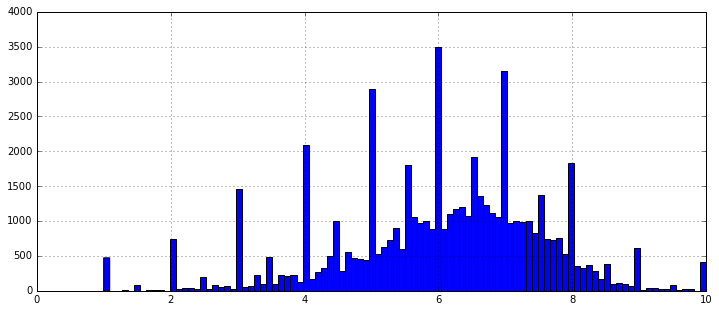

In [10]:
board_games["average_rating"].hist(bins=100, figsize=(12,5))

/Users/jeffrey.sternberg/Code/dataquest/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0x111855eb8>],
 'caps': [<matplotlib.lines.Line2D at 0x111863860>,
 'fliers': [<matplotlib.lines.Line2D at 0x1118679e8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1118671d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x11185d8d0>,
  <matplotlib.lines.Line2D at 0x111855be0>]}

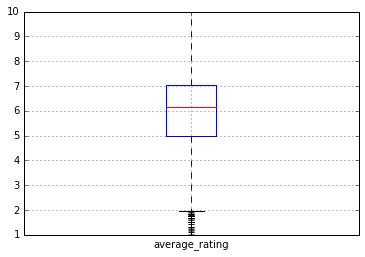

In [11]:
board_games.boxplot("average_rating")

In [12]:
board_games["average_rating"].mean(), board_games["average_rating"].std()

(6.0161128493338492, 1.5788299348332961)

# Error Metric
Ordinary least squares?

Actually, mean squared error

In [13]:
from sklearn.cluster import KMeans

In [14]:
model = KMeans(n_clusters=5, random_state=42)

In [15]:
[c for c in board_games.columns if c not in ('name', 'type', 'id')]

['yearpublished',
 'minplayers',
 'maxplayers',
 'playingtime',
 'minplaytime',
 'maxplaytime',
 'minage',
 'users_rated',
 'average_rating',
 'bayes_average_rating',
 'total_owners',
 'total_traders',
 'total_wanters',
 'total_wishers',
 'total_comments',
 'total_weights',
 'average_weight']

In [16]:
numeric_columns = board_games.iloc[:,3:]

In [17]:
model.fit(numeric_columns)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [18]:
labels = model.labels_

In [19]:
game_mean = numeric_columns.apply(np.mean, axis=1)

In [20]:
game_std = numeric_columns.apply(np.std, axis=1)

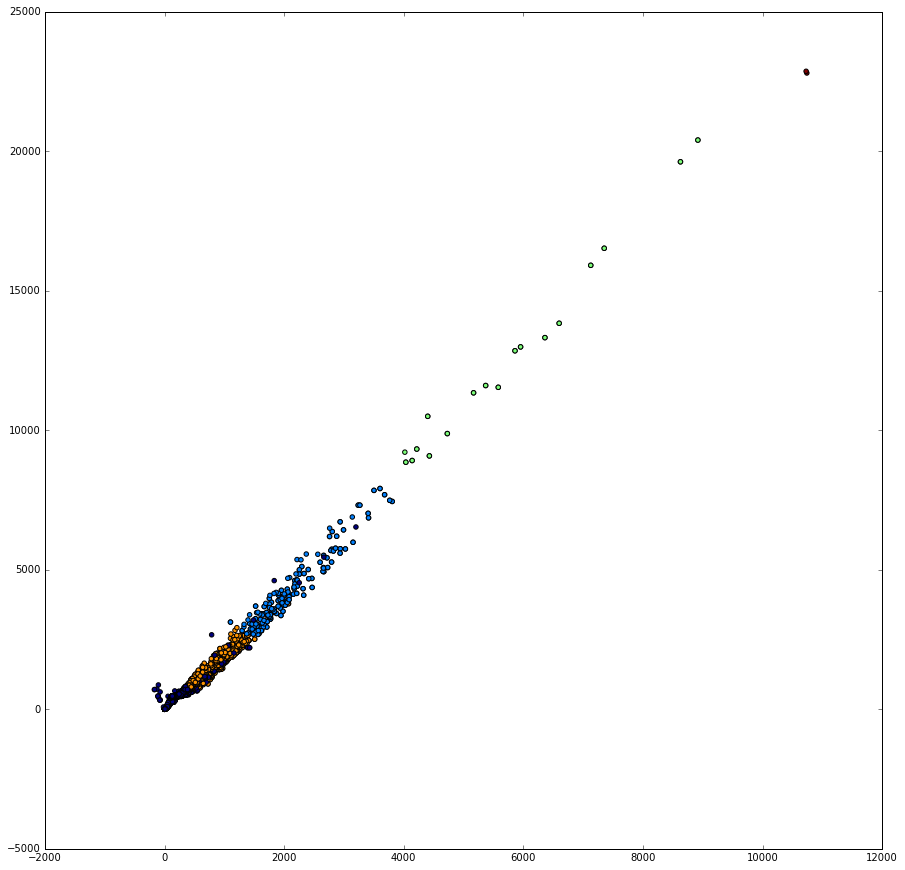

In [21]:
fig = plt.figure(figsize=(15,15))
plt.scatter(x=game_mean, y=game_std, c=labels)
plt.show()

# Correlations

In [22]:
correlations = board_games.corr()

In [23]:
correlations["average_rating"]

id                      0.304201
yearpublished           0.108461
minplayers             -0.032701
maxplayers             -0.008335
playingtime             0.048994
minplaytime             0.043985
maxplaytime             0.048994
minage                  0.210049
users_rated             0.112564
average_rating          1.000000
bayes_average_rating    0.231563
total_owners            0.137478
total_traders           0.119452
total_wanters           0.196566
total_wishers           0.171375
total_comments          0.123714
total_weights           0.109691
average_weight          0.351081
Name: average_rating, dtype: float64

In [24]:
# removing uncorrelated or derived colums:
#"minplayers", "maxplayers", "average_rating", "bayes_average_rating", "playingtime", ""

In [25]:
correlations["average_rating"][(correlations["average_rating"] > 0.1) & 
                               (correlations["average_rating"] < 1) & 
                               (correlations.index != "bayes_average_rating")]

id                0.304201
yearpublished     0.108461
minage            0.210049
users_rated       0.112564
total_owners      0.137478
total_traders     0.119452
total_wanters     0.196566
total_wishers     0.171375
total_comments    0.123714
total_weights     0.109691
average_weight    0.351081
Name: average_rating, dtype: float64

In [26]:
training_columns = correlations["average_rating"][(correlations["average_rating"] > 0.1) & 
                               (correlations["average_rating"] < 1) & 
                               (correlations.index != "bayes_average_rating")].index

In [27]:
training_columns

Index(['id', 'yearpublished', 'minage', 'users_rated', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')

In [28]:
board_games[training_columns].head()

,id,yearpublished,minage,users_rated,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,2005.0,13.0,20113,26647,372,1219,5865,5347,2562,3.4785
1,120677,2012.0,12.0,14383,16519,132,1586,6277,2526,1423,3.8939
2,102794,2013.0,12.0,9262,12230,99,1476,5600,1700,777,3.7761
3,25613,2006.0,12.0,13294,14343,362,1084,5075,3378,1642,4.1590
4,3076,2002.0,12.0,39883,44362,795,861,5414,9173,5213,3.2943


In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
reg = LinearRegression()

In [31]:
reg.fit(board_games[training_columns], board_games["average_rating"])

/Users/jeffrey.sternberg/Code/dataquest/lib/python3.5/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [32]:
predictions = reg.predict(board_games[training_columns])

In [33]:
from sklearn.metrics import mean_squared_error

In [34]:
mse = mean_squared_error(board_games["average_rating"], predictions)

In [35]:
mse

1.8456397982398387

# Linear Regression results

The linear regresion model, given correlated features, predicted average rating with a mean squared error of 1.85 on the training set. This means that the model can predict a rating within 1.85 of the correct rating, on average.